## Visulize dataset

(-0.5, 1619.5, 1079.5, -0.5)

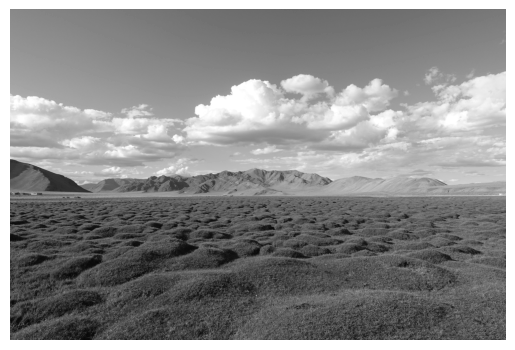

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./dataset/1.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels

# Basic SIFT detector

In [2]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()
print(dir(sift))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'compute', 'create', 'defaultNorm', 'descriptorSize', 'descriptorType', 'detect', 'detectAndCompute', 'empty', 'getContrastThreshold', 'getDefaultName', 'getEdgeThreshold', 'getNFeatures', 'getNOctaveLayers', 'getSigma', 'read', 'setContrastThreshold', 'setEdgeThreshold', 'setNFeatures', 'setNOctaveLayers', 'setSigma', 'write']


Total keypoints:  8878


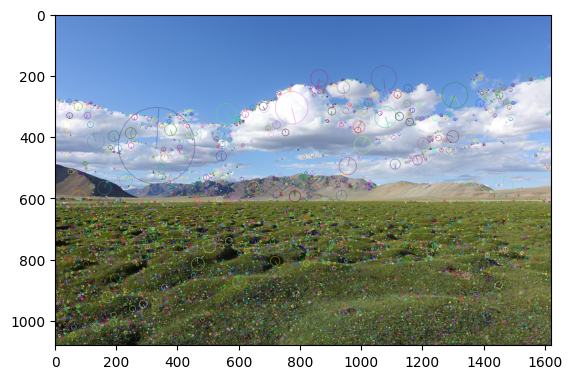

In [3]:
kp = sift.detect(gray, None)
print("Total keypoints: ", len(kp))

img=cv2.drawKeypoints(img,kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Preprocess image, visualize invariant features

In [5]:
# Load the image
original_img = cv2.imread('./dataset/1.jpg')

# Create test image by adding Scale Invariance and Rotational Invariance
smoothed_image = cv2.pyrDown(original_img)
height, width = smoothed_image.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center=(width / 2, height / 2), angle=45, scale=1)
rotation_matrix

array([[  0.70710678,   0.70710678, -72.2970773 ],
       [ -0.70710678,   0.70710678, 365.45941546]])

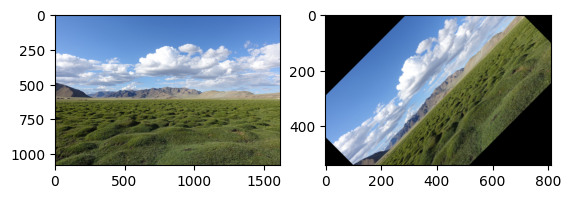

In [11]:
# Apply the rotation to the image using the warpAffine function
rotated_image = cv2.warpAffine(smoothed_image, rotation_matrix, (width, height))

# Display the images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
gray= cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray,None)

print("Total keypoints of the rotation image:", len(kp))

Total keypoints of the rotation image: 2248


## Compute and visualize SIFT matches

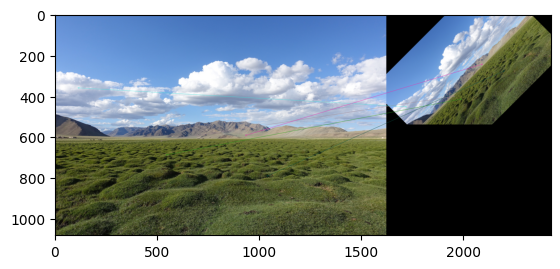

In [14]:
orginal_gray =  cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)
rotation_gray =  cv2.cvtColor(rotated_image,cv2.COLOR_BGR2GRAY)

original_keypoints, original_descriptor = sift.detectAndCompute(orginal_gray, None)
rotation_keypoints, rotation_descriptor = sift.detectAndCompute(rotation_gray, None)

# Create a Brute Force Matcher object.
# Use a brute-force matcher to find matches between the descriptors
bf = cv2.BFMatcher(cv2.NORM_L2)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(original_descriptor, rotation_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

# Draw matches on a new image
result = cv2.drawMatches(original_img, original_keypoints, rotated_image, 
                         rotation_keypoints, matches[:5], None, flags=2)

# Display the result using Matplotlib
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# Print the best matching feature between the original and rotation images
p1 = original_keypoints[matches[0].queryIdx].pt
p2 = rotation_keypoints[matches[0].trainIdx].pt
print("p1 = ", p1,", p2 = ", p2)

p1 =  (114.92366027832031, 360.5277404785156) , p2 =  (95.96031188964844, 452.55194091796875)


## Basic image stitching with 2 images

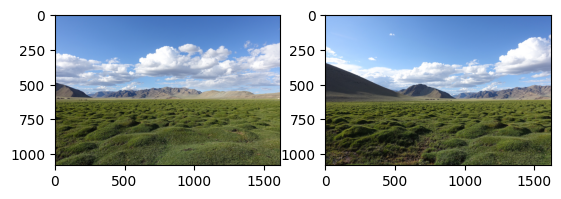

In [18]:
src_img = cv2.imread('dataset/1.jpg')
tar_img = cv2.imread('dataset/2.jpg')

# Display the images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(tar_img, cv2.COLOR_BGR2RGB))
plt.show()

In [61]:
src_gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tar_gray = cv2.cvtColor(tar_img, cv2.COLOR_BGR2GRAY)

SIFT_detector = cv2.SIFT_create()
kp1, des1 = SIFT_detector.detectAndCompute(src_gray, None)
kp2, des2 = SIFT_detector.detectAndCompute(tar_gray, None)

In [62]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.match(des1, des2)
# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)
print(len(matches))

8878


In [63]:
pts1 = np.float32([ kp1[matches[i].queryIdx].pt for i in range(10) ]).reshape(-1,1,2)
pts2 = np.float32([ kp2[matches[i].trainIdx].pt for i in range(10) ]).reshape(-1,1,2)
print("p1 = ", pts1)
print("p2 = ", pts2)

p1 =  [[[494.25873 558.7552 ]]

 [[520.5432  542.6073 ]]

 [[489.28983 549.7042 ]]

 [[510.21368 591.85645]]

 [[513.765   356.71378]]

 [[559.06354 553.321  ]]

 [[552.17    531.9678 ]]

 [[432.75537 599.01855]]

 [[459.03662 574.62427]]

 [[518.9058  361.61728]]]
p2 =  [[[1143.261    563.6687 ]]

 [[1168.8365   546.5824 ]]

 [[1137.884    554.8041 ]]

 [[1160.8688   596.746  ]]

 [[1153.2708   359.2219 ]]

 [[1210.2434   556.13257]]

 [[1201.7762   534.4256 ]]

 [[1084.8734   604.51337]]

 [[1109.0356   580.2331 ]]

 [[1158.6437   363.5833 ]]]


In [64]:
# estimate the homography between the sets of points
(H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H)

h1, w1 = src_img.shape[:2]
h2, w2 = tar_img.shape[:2]

result = cv2.warpPerspective(src_img, H, (w1+w2, h1))
# result[0:h2, 0:w2] = tar_img

[[ 3.40944993e-01  1.95657012e-02  7.27756048e+02]
 [-2.47049642e-01  7.87251969e-01  1.29572621e+02]
 [-3.99747822e-04 -1.57482580e-05  1.00000000e+00]]


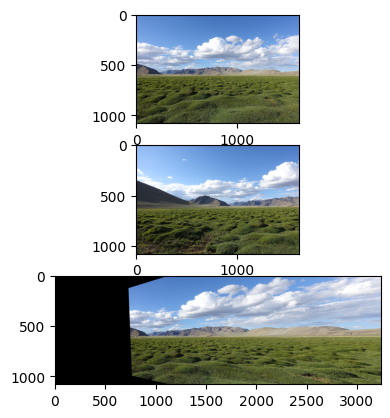

In [65]:
# Display the images side by side
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))

plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(tar_img, cv2.COLOR_BGR2RGB))

plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.show()

### Stitching multiple images

In [ ]:
img0 = cv2.imread('dataset/1.jpg')
src_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
SIFT_detector = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2)
kp1, des1 = SIFT_detector.detectAndCompute(src_gray, None)
for i in range(1, 8):
    img_color = cv2.imread(f'dataset/{i}.jpg')
    dest_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    kp2, des2 = SIFT_detector.detectAndCompute(dest_gray, None)
    matches = bf.match(des1, des2)
    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)
  

## Image stitching using opencv

In [58]:
imgs = []
for i in range(8):
  imgs.append(cv2.imread('dataset/{}.jpg'.format(i+1)))

In [59]:
def stitch_images(images):
    # Create a Stitcher object
    stitcher = cv2.Stitcher_create()

    # Stitch the images together
    # output status, result image
    _ , result = stitcher.stitch(images)

    # Return the result
    return result

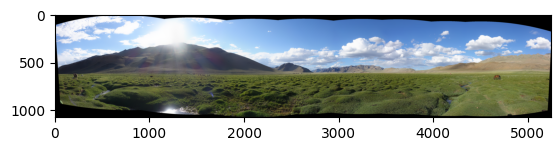

In [60]:
result = stitch_images(imgs)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()